## Лабораторна робота № 5 </br>
### Моделювання та оцінювання гетероскедастичних процесів 

In [1]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd


%matplotlib inline
plt.rcParams["figure.figsize"] = (6,6)
warnings.filterwarnings("ignore")

In [2]:
def read_data_from_file(file_path):
    with open(file_path) as file:
        content = file.read()   
    content = content.split('\n')
    return list(map(float, content))

In [3]:
def create_feature_matrix(x, ar):
        len_matr = x.shape[0] - ar
        feature_matrix = pd.DataFrame({"intercept":np.ones((1,len_matr))[0]}, index = range(len_matr))
        for i in range(1, ar+1):
            feature_matrix[f"y(k-{i})"] = x[ar-i:-i]
        y = x[ar:]
        return y, feature_matrix

In [4]:
def lsm(y, feature):

        feature_matrix=feature.to_numpy()
        inform_matr = np.linalg.inv(feature_matrix.T@feature_matrix)
        inform_matr = inform_matr @ feature_matrix.T
        return inform_matr@y

In [5]:
data = read_data_from_file('data/ARCH_01.dat')

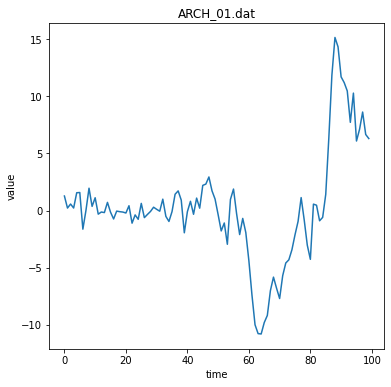

In [6]:
plt.plot(data)
plt.xlabel('time')
plt.ylabel('value')
plt.title('ARCH_01.dat')
plt.show();

Знайдіть середнє значення ряду, стандартне відхилення

In [7]:
pd.DataFrame(data, columns =['value']).describe()

,value
count,100.000000
mean,0.263369
std,4.894091
min,-10.800000
25%,-1.091000
50%,-0.083150
75%,1.309250
max,15.150000


Побудувати для введених даних модель АР(1) 

In [8]:
pacf(data, nlags =24, method = 'ldb')

array([ 1.        ,  0.92922263, -0.15349537, -0.04926874,  0.02341412,
       -0.01291659, -0.17901202,  0.05069447, -0.00350981,  0.06665667,
       -0.12681158, -0.14454636, -0.1210458 ,  0.06929319, -0.15570696,
        0.12090072,  0.01242465,  0.00846026, -0.1931802 , -0.0073612 ,
        0.00927294, -0.11284645, -0.08647626, -0.10118011, -0.0961931 ])

In [9]:
ar_1 = ARIMA(data, order= ([1], 0 , 0))
ar_1 = ar_1.fit()
ar_1_predict = ar_1.predict()
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -196.291
Date:                Tue, 20 Apr 2021   AIC                            398.582
Time:                        18:54:13   BIC                            406.397
Sample:                             0   HQIC                           401.745
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0493      2.803      0.374      0.708      -4.445       6.543
ar.L1          0.9348      0.031     29.942      0.000       0.874       0.996
sigma2         2.9073      0.355      8.199      0.000       2.212       3.602
===================================================================================
Ljung-Box (L1) (Q):                   2.55   Jarque-Bera (JB):                13.95
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               4.88   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

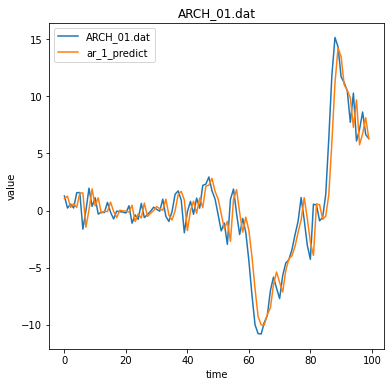

In [10]:
plt.plot(data, label = 'ARCH_01.dat')
plt.xlabel('time')
plt.ylabel('value')
plt.title('ARCH_01.dat')

plt.plot(ar_1_predict, label = 'ar_1_predict')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show();

Побудуйте автокореляційну функцію (АКФ) для отриманого після побудови моделі АР(1) ряду із залишків. 

In [11]:
resid = data - ar_1_predict

In [12]:
pd.DataFrame(resid, columns =['value']).describe()

,value
count,100.000000
mean,-0.002095
std,1.713805
min,-3.591352
25%,-1.355243
50%,0.031993
75%,0.849397
max,5.848582


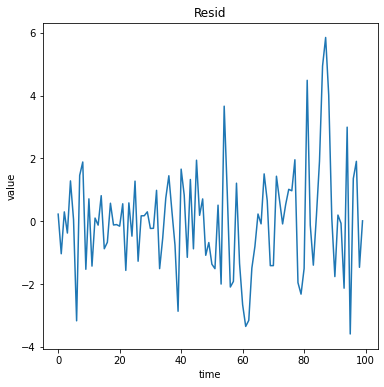

In [13]:
plt.plot(resid)
plt.xlabel('time')
plt.ylabel('value')
plt.title('Resid')
plt.show();

In [14]:
acf(resid, nlags=24)

array([ 1.        ,  0.15669633,  0.01433378, -0.00930987, -0.00369124,
        0.07528894,  0.006888  , -0.09098415, -0.14212275,  0.06777887,
        0.10587991,  0.09240054, -0.0341311 ,  0.12803238, -0.06201404,
       -0.03927552, -0.05703165,  0.01199997, -0.00586518, -0.03098624,
        0.05174283, -0.05408233,  0.06096627,  0.03144894, -0.1945588 ])

Згенеруйте новий ряд із квадратів залишків

In [15]:
resid_sqr = resid*resid

In [16]:
pd.DataFrame(resid_sqr, columns =['value']).describe()

,value
count,100.000000
mean,2.907760
std,5.281829
min,0.000114
25%,0.206259
50%,1.128405
75%,2.527925
max,34.205912


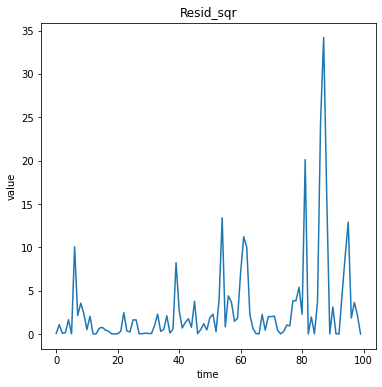

In [17]:
plt.plot(resid_sqr)
plt.xlabel('time')
plt.ylabel('value')
plt.title('Resid_sqr')
plt.show();

Обчисліть автокореляційну функцію для ряду із квадратів залишків. 

In [18]:
acf(resid_sqr, nlags=24)

array([ 1.        ,  0.48566616,  0.13249208, -0.05249931, -0.08582649,
        0.04973652,  0.22693413,  0.27843206,  0.22345272,  0.13588563,
       -0.01050615, -0.07132324, -0.09656088, -0.07361059,  0.01481384,
       -0.01705337,  0.01616779,  0.03028693, -0.00801584,  0.01533594,
        0.00323824, -0.02393287, -0.06280178, -0.02739885,  0.06118613])

За допомогою МНК обчисліть оцінки коефіцієнтів рівняння першого порядку для дисперсії залишків

In [19]:
y_1, feature_1 = create_feature_matrix(resid_sqr, 1)

In [20]:
coef_1 = lsm(y_1, feature_1)
coef_1

array([1.50582651, 0.48714202])

Обчисліть коефіцієнти рівняння АРУГ(4)

In [22]:
y_4, feature_4 = create_feature_matrix(resid_sqr, 4)

In [23]:
coef_4 = lsm(y_4, feature_4)
coef_4

array([ 1.92036876,  0.53941521, -0.09438732, -0.07731528, -0.0069391 ])